## Regression exercise
#### ## Welcome in the part 1!!

We are going to work with randomly generalize data and trying to fit different polynomial regressions to it and explore how our loss function behaves. We will use the formulas we introduced in theoretical sections and we will create linear regression model from scratch.

In [1]:
import numpy as np

#### Task 1

Write a function psi(x,m) defined as $\psi(x)=[1, x, x ^2, ..., x^m]$

In [2]:
def psi(x,m):
    psi = []
    for i in range(m+1):
        psi.append(x**i)
    return psi

In [3]:
psi(2, 3)

[1, 2, 4, 8]

#### Task 2

Write a function $h(x,\alpha)$ defined as $h(x,\alpha)=\alpha^T\psi(x)$

In [4]:
def h(x, alpha, m):
    return np.dot(alpha, psi(x, m))

#### Task 3
Create a random 3rd order polynomial (we call it p3)

In [5]:
p3 = np.poly1d([1,-3, 2,-1])

In [6]:
p3(2)

-1

#### Task 4
Choose an interval [a,b], on which the polynomial is S-shaped.

In [7]:
# we take interval [-3,5)

#### Task 5
Sample 30 random values in [a,b] and stored them in `xs`.

In [8]:
xs = (np.random.random_sample(30) * 8) - 3

#### Task 6
For each x in xs, compute p3(x) and store them as `ys`.

In [9]:
ys = p3(xs)

In [10]:
ys

array([ 26.77067609,  14.30883104, -34.23288658,  10.91996467,
       -27.80054895,   1.57945901,  -2.98605533,  -3.21712564,
         0.32128525,  -0.63423293,   7.18574265, -10.30523647,
       -22.68445897,  -1.37278897, -11.74064515, -14.27740541,
        -8.85765428,  13.96750211,  -1.3351692 ,  -6.82924062,
        51.2711287 ,  -5.05157455,  -1.18377649,  54.56691018,
         0.11406396,  -5.98664732, -17.36656072,  -1.17174104,
         5.39957757, -20.55037904])

#### Task 7:
Plot `ys` against `xs` on [a,b]. Does it look like a third order polynomial?

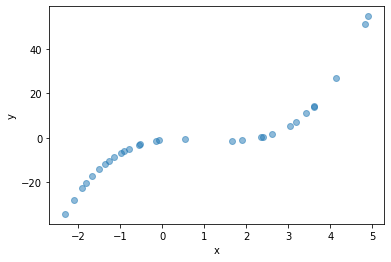

In [11]:
import matplotlib.pyplot as plt
plt.scatter(xs, ys, alpha=0.5)
# plt.title('')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Fitting the data

We will try to fit the data by a polynomial of order m=2. 

#### Task 8:

Using xs and psi, create the matrix X defined as 

<img src="matrixX.png">

In [12]:
m = 2
def create_X(m):
    # X = np.zeros([len(xs),m+1])
    X = np.zeros([m+1,len(xs)])
    for i in range(len(list(xs))):
        X[:,i] = psi(list(xs)[i],m)
    return X

In [13]:
X = create_X(2)

#### Task 9
Compute the optimal $\alpha$ using the expression $\alpha = (XX^T)^+Xy$ where $(XX^T)^+$ is the pseudoinverse matrix. y is our `ys` from the Task 6.

In [14]:
def compute_alpha(X, ys):
    return np.dot(np.dot(np.linalg.inv(np.dot(X, X.transpose())),X), ys)

In [18]:
alpha = compute_alpha(X, ys)

#### Task 10
Plot the data and the computed polynomial. Does it fit?

In [19]:
import matplotlib.pyplot as plt
def plot_predictions(alpha, m, test=True):
    # we using "new" data now.
    if test:
        x = (np.random.random_sample(30) * 8) - 3
    else:
        x = xs
    y_est = []
    for i in range(len(list(x))):
        y_est.append(h(list(x)[i],alpha, m))
    
    plt.scatter(xs, ys, alpha=0.5, c="red")
    plt.scatter(x, y_est, alpha=0.5, c="blue")
    # plt.title('')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

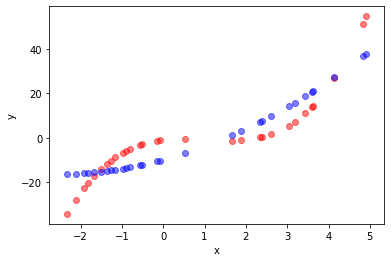

In [20]:
plot_predictions(alpha, m, test=False)

#### Task 11
Repeat the process for m=3,…,10. What do you observe?

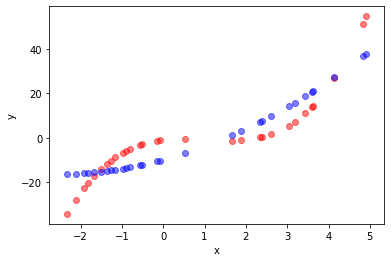

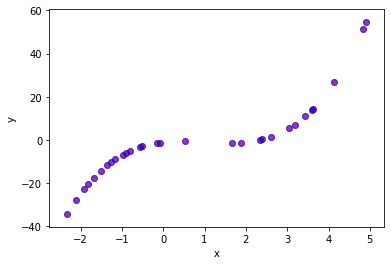

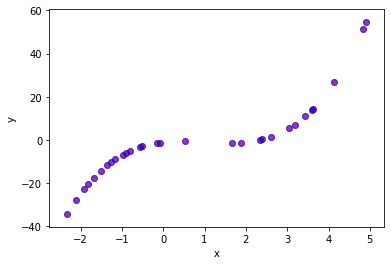

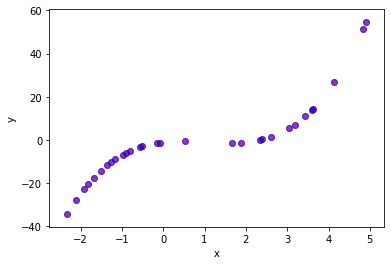

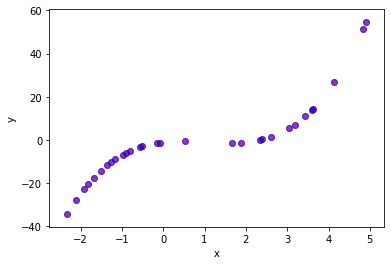

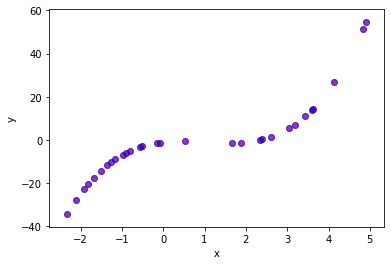

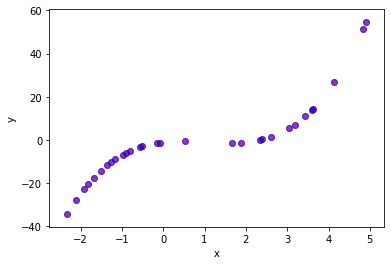

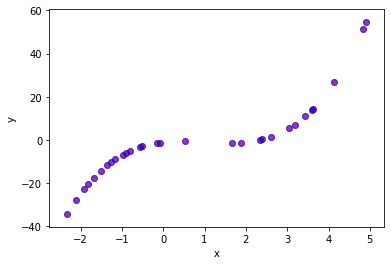

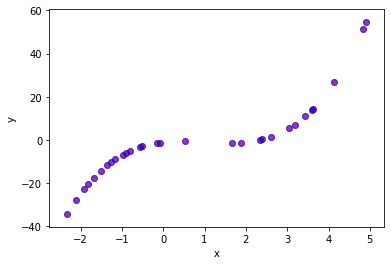

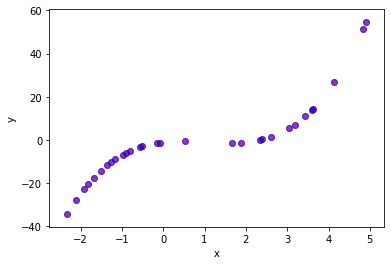

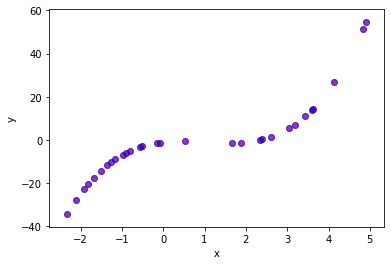

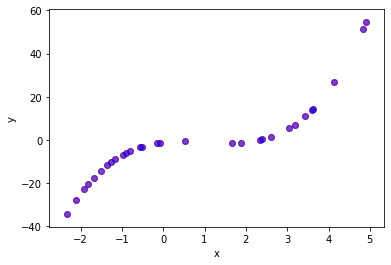

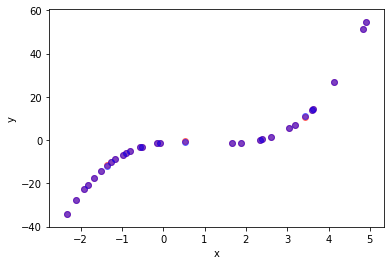

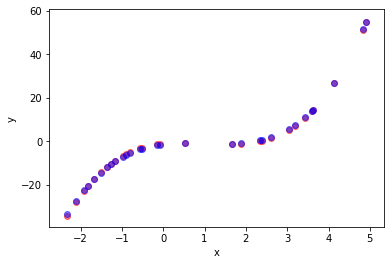

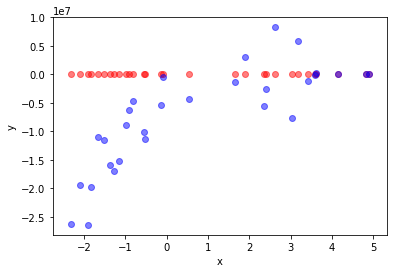

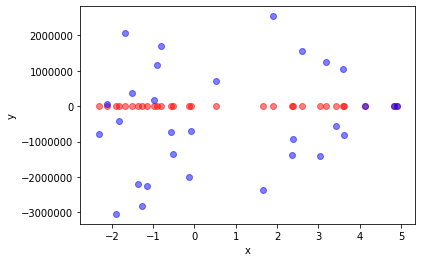

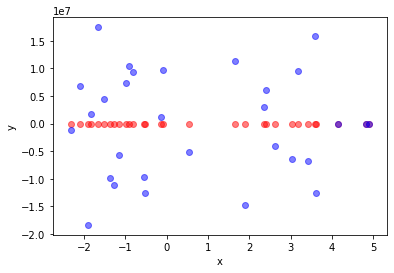

In [23]:
ms = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,80, 90,100]
for m in ms:
#     print(m)
    X = create_X(m)
    alpha = compute_alpha(X, ys)
    plot_predictions(alpha, m, test=False)

#### Task 12
Plot the value of the loss (defined as $ l(\alpha^Tx, y) = \sum(\alpha^Tx - y)^2 $  ) for m=2,…,10. y is our `ys` from the Task 6. What do you observe? Could you tell the optimal m from the plot?

In [29]:
def compute_loss(y_est, ys):
    return ((y_est - ys)**2).sum()

In [30]:
import matplotlib.pyplot as plt
def find_loss(alpha, m, test=True):
    # we using "new" data now.
    if test:
        x = (np.random.random_sample(30) * 8) - 3
    else:
        x = xs
    y_est = []
    for i in range(len(list(x))):
        y_est.append(h(list(x)[i],alpha, m))

    loss = compute_loss(y_est, ys)
    return loss

In [41]:
ms = range(2,10)
losses = []
for m in ms:
    X = create_X(m)
    alpha = compute_alpha(X, ys)
    losses.append(find_loss(alpha, m, test=False))

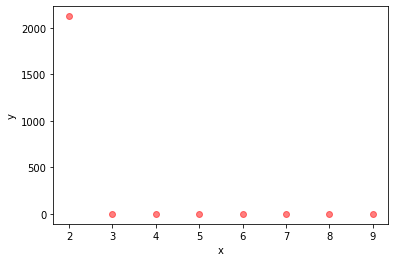

In [42]:
plt.scatter(ms, losses, alpha=0.5, c="red")
# plt.title('')
plt.xlabel('x')
plt.ylabel('y')
# plt.ylim(0,0.1)
# plt.xlim(0,20)
plt.show()